# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [2]:
# Group by Drug Regimen
drug_data = mouse_data.groupby('Drug Regimen')

#Mean Tumor Volume
mean_tumor_vol = drug_data['Tumor Volume (mm3)'].mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)
mean_tumor_vol = mean_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

#Median Tumor Volume
median_tumor_vol = drug_data['Tumor Volume (mm3)'].median()
median_tumor_vol= pd.DataFrame(median_tumor_vol)
median_tumor_vol = median_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})

#Tumor Volume Variance
var_tumor_vol = drug_data['Tumor Volume (mm3)'].var()
var_tumor_vol = pd.DataFrame(var_tumor_vol)
var_tumor_vol = var_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})

#Tumor Volume Standard Deviation
std_dev_tumor_vol = drug_data['Tumor Volume (mm3)'].std()
std_dev_tumor_vol = pd.DataFrame(std_dev_tumor_vol)
std_dev_tumor_vol = std_dev_tumor_vol.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})

#SEM Tumor Volume
sem_tumor_vol = drug_data['Tumor Volume (mm3)'].sem()
sem_tumor_vol = pd.DataFrame(sem_tumor_vol)
sem_tumor_vol = sem_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

#Merging
summary_stats = pd.merge(mean_tumor_vol, median_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, var_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, std_dev_tumor_vol, left_index= True, right_index= True)
summary_stats = pd.merge(summary_stats, sem_tumor_vol, left_index= True, right_index= True)

#Show Data
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
organized_summary_stats = summary_stats.rename(columns={'Mean Tumor Volume':'mean',
                                                       'Median Tumor Volume': 'median',
                                                       'Tumor Volume Variance': 'var',
                                                       'Tumor Volume Std. Dev.':'std',
                                                       'Tumor Volume Std. Err.':'sem'})
organized_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

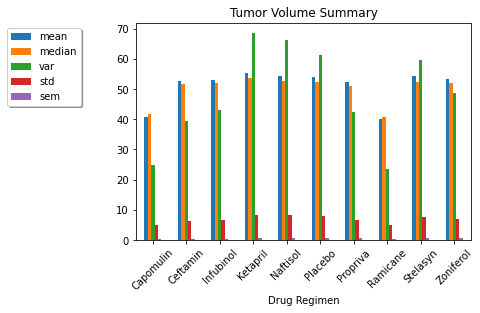

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_bar_chart = organized_summary_stats.plot(kind='bar',title= 'Tumor Volume Summary')
# Set the xlabel
summary_bar_chart.set_xlabel("Drug Regimen")

#legend
summary_bar_chart.legend(loc='upper left', bbox_to_anchor=(-0.4,1), shadow=True, ncol=1)

# Set tick labels
summary_bar_chart.set_xticklabels(organized_summary_stats.index, rotation=45)

plt.show()
plt.tight_layout()

(0.0, 255.0)

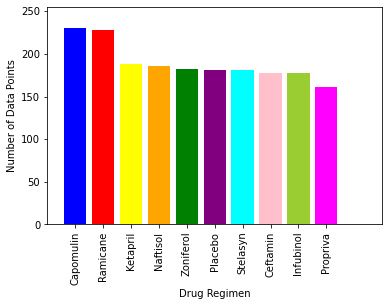

In [5]:
# Get Number of Data Points for each Regimen
organized_drug_regimen = mouse_data.groupby('Drug Regimen')
organized_drug_regimen = organized_drug_regimen['Timepoint'].count()
organized_drug_regimen = pd.DataFrame(organized_drug_regimen)
organized_drug_regimen = organized_drug_regimen.sort_values('Timepoint',ascending=False)
drug_count = organized_drug_regimen['Timepoint']

#Get labels by using Drug Regimen
drug_regimen = organized_drug_regimen.index

# set x-axis
x_axis = np.arange(len(drug_count))

#set colors
colors = 'blue','red','yellow','orange','green','purple','cyan','pink','yellowgreen', 'magenta'

# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, drug_count , align="center", color=colors)

#Set ticks
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)


# Set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#Set x and y limits
plt.xlim(-1, len(x_axis)+1)
plt.ylim(0, max(drug_count)+25)

Text(0.5, 1.0, 'Sex')

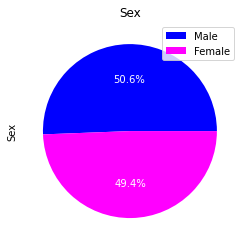

In [6]:
#Get male versus female count
sex_count = mouse_data['Sex'].value_counts()
sex_count_df = pd.DataFrame(sex_count)

#set colors
sex_color = 'blue','magenta'

#Generate a pie plot showing the distribution of female versus male mice using panda
sex_count_df.plot(kind='pie', y='Sex' , colors=sex_color,
        autopct="%1.1f%%",textprops={'color':"w"} )
plt.title("Sex")

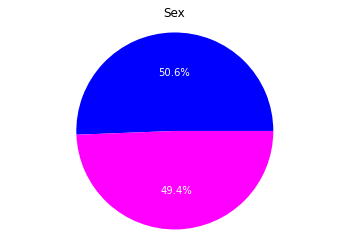

In [7]:
#pie chart using pyplot
plt.title("Sex")
plt.pie(sex_count, colors=sex_color,
        autopct="%1.1f%%",textprops={'color':"w"})
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [8]:
#sort data by Mouse ID and Timepoint
sorted_mouse_data = mouse_data.sort_values(['Mouse ID','Timepoint'],ascending=False)
sorted_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
109,z969,45,73.867845,4,Naftisol,Male,9,30
108,z969,40,70.314904,4,Naftisol,Male,9,30
107,z969,35,69.176246,4,Naftisol,Male,9,30
106,z969,30,65.841013,3,Naftisol,Male,9,30
105,z969,25,63.145652,2,Naftisol,Male,9,30
...,...,...,...,...,...,...,...,...
902,a203,20,55.173336,1,Infubinol,Female,20,23
901,a203,15,52.777870,1,Infubinol,Female,20,23
900,a203,10,51.852437,1,Infubinol,Female,20,23
899,a203,5,48.508468,0,Infubinol,Female,20,23


In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
top_timepoint = sorted_mouse_data.drop_duplicates('Mouse ID')
top_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
109,z969,45,73.867845,4,Naftisol,Male,9,30
683,z795,45,65.741070,3,Naftisol,Female,13,29
279,z581,45,62.754451,3,Infubinol,Female,24,25
646,z578,45,30.638696,0,Ramicane,Male,11,16
1566,z435,10,48.710661,0,Propriva,Female,12,26
...,...,...,...,...,...,...,...,...
736,a366,30,63.440686,1,Stelasyn,Female,16,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
1134,a262,45,70.717621,4,Placebo,Female,17,29
289,a251,45,65.525743,1,Infubinol,Female,21,25


In [51]:
#Detect Outlier function
outliers=[]
def detect_outlier(data):
    #clears outliers
    outliers=[]
    
    #calculates outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    for y in data:
        if y < (Q1 - 1.5 * IQR):
            outliers.append(y)
        elif y > (Q3 + 1.5 * IQR):
            outliers.append(y)
    return outliers

In [52]:
# Quantitatively determine capomulin outliers
capomulin_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Capomulin', :]
capomulin = capomulin_data['Tumor Volume (mm3)']
detect_outlier(capomulin)

[]

In [53]:
# Quantitatively determine ramicane outliers
ramicane_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Ramicane', :]
ramicane = ramicane_data['Tumor Volume (mm3)']
detect_outlier(ramicane)

[]

In [54]:
# Quantitatively determine infubinol outliers
infubinol_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Infubinol', :]
infubinol = infubinol_data['Tumor Volume (mm3)']
detect_outlier(infubinol)

[36.321345799999996]

In [55]:
# Quantitatively determine ceftamin outliers
ceftamin_data = top_timepoint.loc[top_timepoint["Drug Regimen"]=='Ceftamin', :]
ceftamin = ceftamin_data['Tumor Volume (mm3)']
detect_outlier(ceftamin)

[]

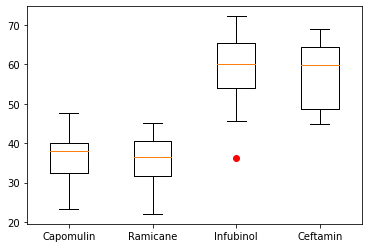

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
a1= [capomulin, ramicane, infubinol, ceftamin]

top_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
box_x_axis = np.arange(len(a1))            
                       
fig1, ax1 = plt.subplots()
ax1.boxplot(a1, 0, 'r')

plt.xticks([1, 2, 3,4], top_drug_regimens)

plt.show()

## Line and Scatter Plots

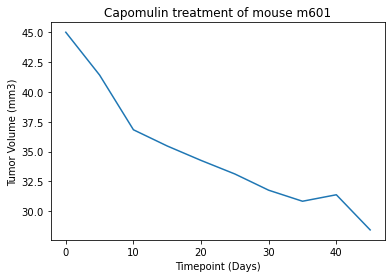

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = mouse_data.loc[mouse_data["Drug Regimen"]=='Capomulin', :]
capomulin_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=='m601',:]

#labels
plt.title('Capomulin treatment of mouse m601')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

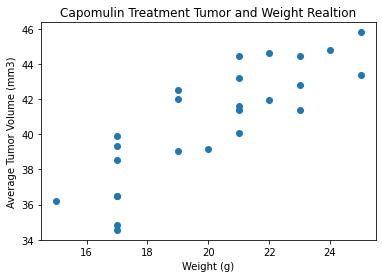

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = mouse_data.loc[mouse_data["Drug Regimen"]=='Capomulin', :]
capomulin_regimen = capomulin_regimen.groupby('Mouse ID')
capomulin_avg = capomulin_regimen['Tumor Volume (mm3)'].mean()
capomulin_avg = pd.DataFrame(capomulin_avg)
capomulin_avg = capomulin_avg.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
capomulin_weight = capomulin_regimen.max()

#plot
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_avg['Average Tumor Volume (mm3)']
plt.scatter(x_values,y_values)

#labels
plt.title("Capomulin Treatment Tumor and Weight Realtion")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

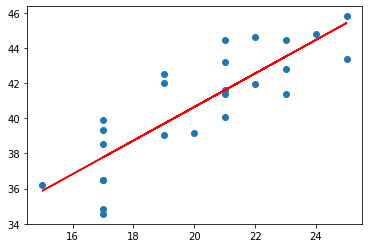

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")